Evolución de los Precios de la Electricidad
===

# Instrucciones

En el archivo `precios.zip`  se encuentran los archivos `Precio_Bolsa_Nacional_($kwh)_ano.xls` en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada realice las siguientes actividades. 

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas).

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import datetime as dt
import glob

%matplotlib inline

In [2]:
def LeerPrecios(filename):
    for indice in range(10):
        DataFrame = pd.read_excel(filename,skiprows = indice ,usecols = list(range(25)))
        if DataFrame.iloc[0,0] == 'Fecha':
            DataFrame = pd.read_excel(filename,skiprows = indice+1, usecols = list(range(25)))
            break
    return DataFrame

In [3]:
Archivos = !ls precios/*.xls*
DataFrames = []
for filename in Archivos:
    DataFrames.append(LeerPrecios(filename))
DataFrames = pd.concat(DataFrames)
DataFrames = pd.melt(DataFrames,id_vars = 'Fecha')
DataFrames.columns = ['Fecha','Hora','Precio']

In [4]:
DataFrames.shape[0]

201816

**2.--** Compute e imprima el número de registros con datos faltantes.

In [6]:
df1 = DataFrames.dropna()

In [7]:
DataFrames.shape[0] - df1.shape[0]

238

**3.--** Compute e imprima el número de registros duplicados.

In [8]:
DataFrameSinRepetir = DataFrames.copy()
DataFrameSinRepetir = DataFrameSinRepetir.drop_duplicates()
TotalRepetidos =  len(DataFrames.index) - len(DataFrameSinRepetir.index)
TotalRepetidos

1951

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [9]:
DataFrameSinRepetir = DataFrames.copy()
DataFrameSinRepetir = (DataFrameSinRepetir.drop_duplicates())
DataFrameSinRepetir = DataFrameSinRepetir.dropna()
len(DataFrameSinRepetir.index)

199819

**5.--** Compute y grafique el precio primedio diario.

In [10]:
df = DataFrames.copy()

In [11]:
df['dia'] = pd.DatetimeIndex(df['Fecha']).day
df['mes'] = pd.DatetimeIndex(df['Fecha']).month

In [12]:
df.head()

,Fecha,Hora,Precio,dia,mes
0,1995-07-20,0,NaN,20.0,7.0
1,1995-07-21,0,1.073,21.0,7.0
2,1995-07-22,0,1.073,22.0,7.0
3,1995-07-23,0,1.073,23.0,7.0
4,1995-07-24,0,1.000,24.0,7.0


In [13]:
aux = df.groupby('dia')['Precio'].mean()

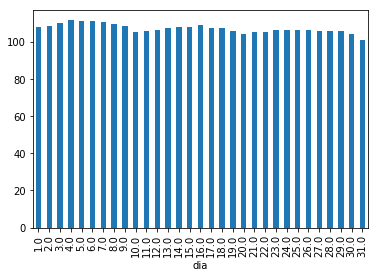

In [14]:
aux.plot(kind="bar")

**6.--** Compute y grafique el precio máximo por mes.

In [15]:
aux = df.groupby('mes')['Precio'].max()

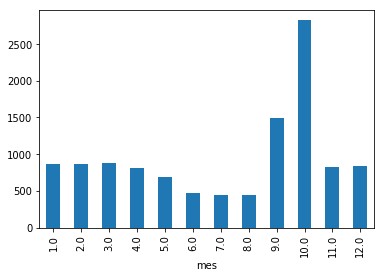

In [16]:
aux.plot(kind="bar")

**7.--** Compute y grafique el precio mínimo mensual.

In [17]:
aux = df.groupby('mes')['Precio'].min()

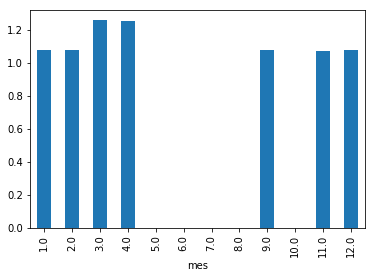

In [18]:
aux.plot(kind="bar")

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

In [19]:
aux = df.groupby('mes')['Precio'].max()

In [20]:
aux2 = df.groupby('mes')['Precio'].mean()

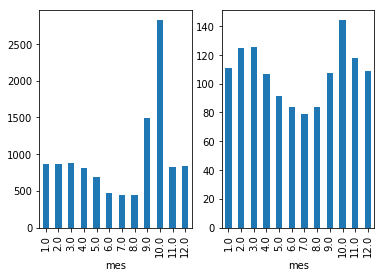

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2)
aux.plot(kind="bar", ax=axes[0])
aux2.plot(kind="bar", ax=axes[1])

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

In [22]:
df['dia_semana'] = [a.weekday() for a in pd.to_datetime(df['Fecha'])]

In [23]:
aux = df.copy()

In [24]:
aux = aux[aux['dia_semana'] < 5]

In [25]:
aux2 = aux.groupby('Fecha')['Precio'].max()#.agg({'Precio': np.max}) 

In [26]:
aux3 = pd.DataFrame({'Fecha':aux2.index, 'PrecioMax':aux2.values})

In [27]:
aux['Fecha'] = pd.to_datetime(aux['Fecha'])

In [28]:
aux5 = pd.merge(aux, aux3, on=['Fecha'], how='inner')

In [29]:
aux6 = aux5[aux5['Precio'] == aux5['PrecioMax']]

In [30]:
aux6.head()

,Fecha,Hora,Precio,dia,mes,dia_semana,PrecioMax
10,1995-07-20,10,2.827,20.0,7.0,3.0,2.827
11,1995-07-20,11,2.827,20.0,7.0,3.0,2.827
12,1995-07-20,12,2.827,20.0,7.0,3.0,2.827
43,1995-07-21,19,16.670,21.0,7.0,4.0,16.670
67,1995-07-24,19,22.500,24.0,7.0,0.0,22.500


In [31]:
a = list(map(int,aux6['Hora'].tolist()))

(array([  42.,   29.,   25.,   20.,   31.,   92.,  135.,  169.,  300.,
         402.,  659., 1048.,  614.,  562.,  778.,  719.,  521.,  423.,
        2801., 5064., 1677.,  630.,  153.,   41.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <a list of 24 Patch objects>)

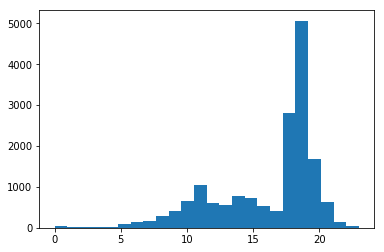

In [32]:
plt.hist(a, bins=24)

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

In [33]:
DatosPorDia = DataFrameSinRepetir.copy()
DatosPorDia['Fecha'] = pd.to_datetime(DatosPorDia['Fecha'])
DatosPorDia['Dia'] =  DatosPorDia[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%A'), axis=1)
DataFramePorDiaSabado = DatosPorDia[(DatosPorDia['Dia'] == 'Saturday') ]
DataFrameAgrupadoPorFecha = DataFramePorDiaSabado.groupby('Fecha').agg({'Precio': np.max}) 
DataFrameAgrupadoPorFecha.reset_index(inplace=True)
DataFramesMerge = pd.merge(DataFramePorDiaSabado, DataFrameAgrupadoPorFecha, on=['Fecha','Precio'], how='inner')

Text(0, 0.5, 'Numero de ocurrencias')

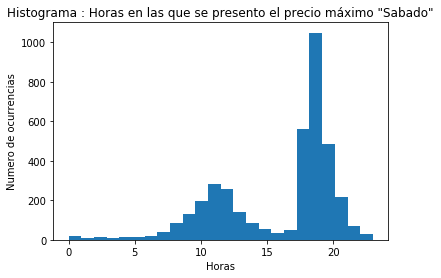

In [34]:
ListaDeHoras = list(map(int,DataFramesMerge['Hora'].tolist()))
plt.hist(ListaDeHoras, bins=24)
plt.title('Histograma : Horas en las que se presento el precio máximo "Sabado"')
plt.xlabel('Horas')
plt.ylabel('Numero de ocurrencias')

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

In [35]:
DatosPorDia = DataFrameSinRepetir.copy()
DatosPorDia['Fecha'] = pd.to_datetime(DatosPorDia['Fecha'])
DatosPorDia['Dia'] =  DatosPorDia[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%A'), axis=1)
DataFramePorDiaDomingo = DatosPorDia[(DatosPorDia['Dia'] == 'Sunday') ]
DataFrameAgrupadoPorFecha = DataFramePorDiaDomingo.groupby('Fecha').agg({'Precio': np.max}) 
DataFrameAgrupadoPorFecha.reset_index(inplace=True)
DataFramesMerge = pd.merge(DataFramePorDiaDomingo, DataFrameAgrupadoPorFecha, on=['Fecha','Precio'], how='inner')

Text(0, 0.5, 'Numero de ocurrencias')

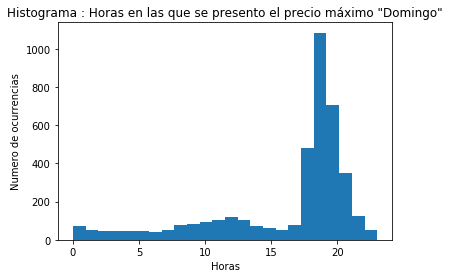

In [36]:
ListaDeHoras = list(map(int,DataFramesMerge['Hora'].tolist()))
plt.hist(ListaDeHoras, bins=24)
plt.title('Histograma : Horas en las que se presento el precio máximo "Domingo"')
plt.xlabel('Horas')
plt.ylabel('Numero de ocurrencias')

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [37]:
df['anio'] = [a.year for a in pd.to_datetime(df['Fecha'])]

In [38]:
df.head()

,Fecha,Hora,Precio,dia,mes,dia_semana,anio
0,1995-07-20,0,NaN,20.0,7.0,3.0,1995.0
1,1995-07-21,0,1.073,21.0,7.0,4.0,1995.0
2,1995-07-22,0,1.073,22.0,7.0,5.0,1995.0
3,1995-07-23,0,1.073,23.0,7.0,6.0,1995.0
4,1995-07-24,0,1.000,24.0,7.0,0.0,1995.0


In [39]:
aux = df.copy()

In [40]:
aux2 = aux.groupby('anio')['Precio'].min()#.agg({'Precio': np.max}) 

In [41]:
aux2.head()

anio
1995.0     0.00000
1996.0     0.00000
1997.0    10.88231
1998.0    13.84733
1999.0    18.35953
Name: Precio, dtype: float64

In [42]:
aux3 = pd.DataFrame({'anio':aux2.index, 'PrecioMin':aux2.values})

In [43]:
aux3.head()

,anio,PrecioMin
0,1995.0,0.00000
1,1996.0,0.00000
2,1997.0,10.88231
3,1998.0,13.84733
4,1999.0,18.35953


In [44]:
aux4 = pd.merge(aux, aux3, on=['anio'], how='inner')

In [45]:
aux4.head()

,Fecha,Hora,Precio,dia,mes,dia_semana,anio,PrecioMin
0,1995-07-20,0,NaN,20.0,7.0,3.0,1995.0,0.0
1,1995-07-21,0,1.073,21.0,7.0,4.0,1995.0,0.0
2,1995-07-22,0,1.073,22.0,7.0,5.0,1995.0,0.0
3,1995-07-23,0,1.073,23.0,7.0,6.0,1995.0,0.0
4,1995-07-24,0,1.000,24.0,7.0,0.0,1995.0,0.0


In [46]:
aux5 = aux4[aux4['Precio'] == aux4['PrecioMin']]

In [47]:
aux6 = aux5[['Fecha', 'PrecioMin']].drop_duplicates()

In [48]:
aux6[['Fecha', 'PrecioMin']]

,Fecha,PrecioMin
8,1995-07-28,0.000000
11,1995-07-31,0.000000
12,1995-08-01,0.000000
85,1995-10-13,0.000000
339,1995-07-29,0.000000
340,1995-07-30,0.000000
3801,1995-07-26,0.000000
4141,1996-06-30 00:00:00,0.000000
4150,1996-07-09 00:00:00,0.000000
4153,1996-07-12 00:00:00,0.000000


**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

In [49]:
aux = df.copy()

In [50]:
aux['mes'] = [a.month for a in pd.to_datetime(df['Fecha'])]

In [51]:
aux.head()

,Fecha,Hora,Precio,dia,mes,dia_semana,anio
0,1995-07-20,0,NaN,20.0,7.0,3.0,1995.0
1,1995-07-21,0,1.073,21.0,7.0,4.0,1995.0
2,1995-07-22,0,1.073,22.0,7.0,5.0,1995.0
3,1995-07-23,0,1.073,23.0,7.0,6.0,1995.0
4,1995-07-24,0,1.000,24.0,7.0,0.0,1995.0


In [52]:
aux1 = aux.groupby('Fecha')['Precio'].mean()

In [53]:
aux2 = aux.groupby(['mes', 'anio'])['Precio'].mean()

In [54]:
aux2.head()

mes  anio  
1.0  1996.0     22.867007
     1997.0     21.623433
     1998.0    133.048868
     1999.0     24.921645
     2000.0     36.778780
Name: Precio, dtype: float64

In [55]:
aux2.index.levels[1]

Float64Index([1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0,
              2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0,
              2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0],
             dtype='float64', name='anio')

In [56]:
aux3 = pd.DataFrame({'anio':aux2.index.to_numpy(), 'Prom':aux2.values})

In [57]:
aux3['anio'] = aux3['anio'][0][1]

In [58]:
aux3.head()

,anio,Prom
0,1996.0,22.867007
1,1996.0,21.623433
2,1996.0,133.048868
3,1996.0,24.921645
4,1996.0,36.778780


In [59]:
aux4 = aux3.T.squeeze()

In [60]:
aux3.head()

,anio,Prom
0,1996.0,22.867007
1,1996.0,21.623433
2,1996.0,133.048868
3,1996.0,24.921645
4,1996.0,36.778780


In [61]:
aux3.columns = ['']

ValueError: Length mismatch: Expected axis has 2 elements, new values have 1 elements

In [ ]:
aux1.head()

In [ ]:
plt.plot(aux1)

In [ ]:
plt.plot(aux4)

In [ ]:
DatosPorMesPromedio = DataFrameSinRepetir.copy()
DatosPorMesPromedio['Fecha'] = pd.to_datetime(DatosPorMesPromedio['Fecha'])
DatosPorMesPromedio['Mes'] =  DatosPorMesPromedio[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%m'), axis=1)
DatosPorMesPromedio['year'] =  DatosPorMesPromedio[['Fecha']].apply(lambda x: dt.datetime.strftime(x['Fecha'], '%Y'), axis=1)
DatosPorMesYear = DatosPorMesPromedio.groupby(['Mes','year']).agg({'Precio': np.mean}) 
DatosPorMesYear.reset_index(inplace=True)
DatosPorMesYear.columns = ['Mes','year','PromedioPorMes']

DataFramesMerge = pd.merge(DatosPorMesYear, DatosPorMesPromedio, on = ['Mes','year'], how ='inner')

DatosPorDia = DataFrameSinRepetir.copy()
DatosPorDia['Fecha'] = pd.to_datetime(DatosPorDia['Fecha'])
DatosPorDia = DatosPorDia.groupby('Fecha').agg({'Precio': np.mean}) 
DatosPorDia.reset_index(inplace=True)
DatosPorDia.columns = ['Fecha','PrecioPorDia']

DataFramesMerge = pd.merge(DatosPorMesYear, DatosPorMesPromedio, on = ['Mes','year'], how ='inner')
DataFramesMerge = pd.merge(DataFramesMerge, DatosPorDia, on = ['Fecha'], how ='inner')
DataFrameHaGraficar = DataFramesMerge.groupby('Fecha').agg({'PrecioPorDia': np.mean,'PromedioPorMes': np.mean}) 


In [ ]:
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots()
ax.plot((DataFrameHaGraficar.index.tolist()), DataFrameHaGraficar['PrecioPorDia'], label="Precio promedio por día")
ax.plot((DataFrameHaGraficar.index.tolist()), DataFrameHaGraficar['PromedioPorMes'], label="Precio promedio por mes")
plt.xlabel("Año")
plt.ylabel("Precio")

ax.legend()


---